In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
starting_pitching = pd.read_csv("starting_pitching.csv")

In [5]:
pd.Series.replace(starting_pitching.Playoff, to_replace = 0, value = 'No', inplace = True)
pd.Series.replace(starting_pitching.Playoff, to_replace = 1, value = 'Yes', inplace = True)

In [6]:
starting_pitching.Playoff = starting_pitching.Playoff.astype('category')

In [7]:
starting_pitching = starting_pitching.loc[starting_pitching["Year"] != 2020, ]
print(starting_pitching.shape)

(630, 35)


In [15]:
# create dataframe with only teams that did/did not make it to playoffs
playoff_teams = starting_pitching.loc[starting_pitching["Playoff"] == "Yes"]
nonplayoff_teams = starting_pitching.loc[starting_pitching["Playoff"] == "No"]

,Year,Tm,G,GS,Wgs,Lgs,ND,Wchp,Ltuf,Wtm,...,RS/GS,RS/IP,IP/GS,Pit/GS,<80,80-99,100-119,≥120,Max,Playoff
0,2000,Anaheim Angels,162.0,162.0,53.0,56.0,53.0,16.0,12.0,82.0,...,5.4,5.2,5.5,92.0,35.0,56.0,64.0,7.0,132.0,No
1,2000,Arizona Diamondbacks,162.0,162.0,62.0,53.0,47.0,14.0,13.0,85.0,...,4.9,4.8,6.2,95.0,28.0,67.0,45.0,22.0,145.0,No
3,2000,Baltimore Orioles,162.0,162.0,52.0,67.0,43.0,14.0,17.0,74.0,...,5.0,4.9,6.2,102.0,19.0,45.0,67.0,31.0,137.0,No
4,2000,Boston Red Sox,162.0,162.0,56.0,54.0,52.0,17.0,14.0,85.0,...,4.9,4.7,5.5,89.0,48.0,67.0,38.0,9.0,134.0,No
5,2000,Chicago Cubs,162.0,162.0,40.0,62.0,60.0,7.0,12.0,65.0,...,4.7,4.1,6.0,100.0,21.0,51.0,73.0,17.0,135.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2021,San Diego Padres,162.0,162.0,36.0,52.0,74.0,14.0,7.0,79.0,...,4.6,3.9,4.6,79.0,64.0,79.0,18.0,1.0,122.0,No
653,2021,Seattle Mariners,162.0,162.0,45.0,45.0,72.0,18.0,7.0,90.0,...,4.4,3.8,5.1,85.0,43.0,91.0,28.0,0.0,113.0,No
657,2021,Texas Rangers,162.0,162.0,33.0,71.0,58.0,14.0,10.0,60.0,...,3.9,3.4,4.9,81.0,69.0,76.0,16.0,1.0,124.0,No
658,2021,Toronto Blue Jays,162.0,162.0,61.0,40.0,61.0,20.0,6.0,91.0,...,5.5,5.6,5.2,85.0,46.0,82.0,34.0,0.0,114.0,No


<function matplotlib.pyplot.show(close=None, block=None)>

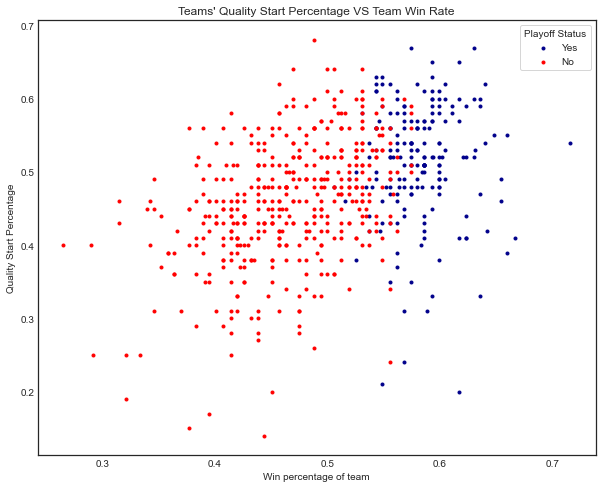

In [27]:
plt.figure(figsize = (10,8))
plt.scatter(playoff_teams['tmW-L%'], playoff_teams['QS%'], color = "darkblue", marker=".")
plt.scatter(nonplayoff_teams['tmW-L%'], nonplayoff_teams['QS%'], color = "red", marker=".")
plt.ylabel("Quality Start Percentage")
plt.xlabel("Win percentage of team")
plt.style.use("seaborn-white")
plt.title("Teams' Quality Start Percentage VS Team Win Rate")
plt.legend(["Yes","No"], title="Playoff Status", frameon=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

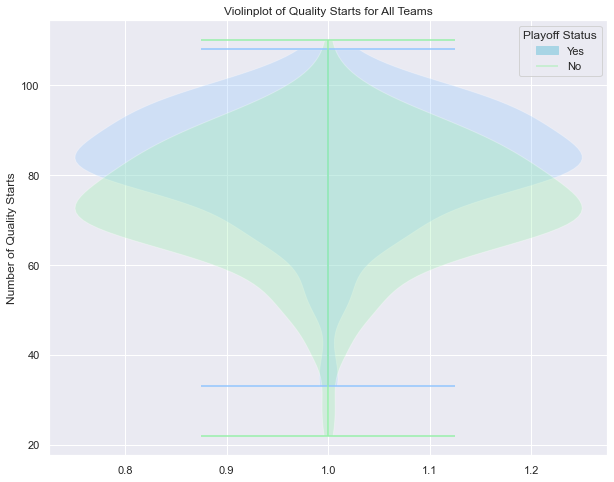

In [55]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn-pastel")
plt.violinplot(starting_pitching.loc[starting_pitching.Playoff == 'Yes', 'QS'])
plt.violinplot(starting_pitching.loc[starting_pitching.Playoff == 'No', 'QS'])
plt.ylabel("Number of Quality Starts")
plt.title("Violinplot of Quality Starts for All Teams")
plt.legend(["Yes", "No"], title="Playoff Status", frameon=True)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('#a8d5e5')
leg.legendHandles[1].set_color('#Bdeec8')
plt.show

Text(0.5, 1.0, 'Histogram of Bequeathed Runners Score for all Teams')

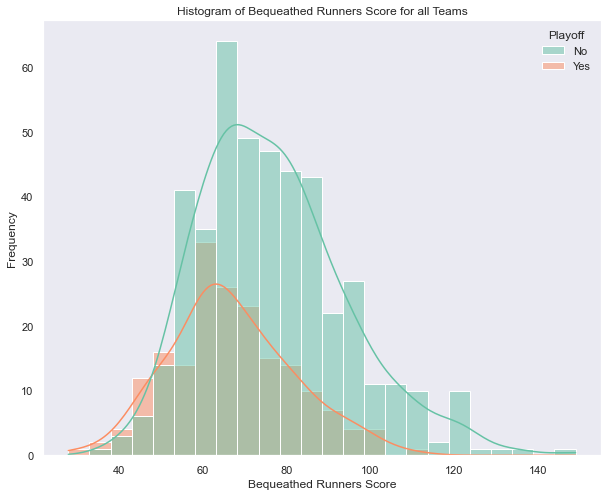

In [88]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="dark", palette="Set2")
sns.histplot(data = starting_pitching, x = "BQS", hue = "Playoff", kde = True)
plt.xlabel("Bequeathed Runners Score")
plt.ylabel("Frequency")
plt.title("Histogram of Bequeathed Runners Score for all Teams")

Text(0.5, 1.0, 'Run Support Per Game VS Wins in Game Started for all Teams')

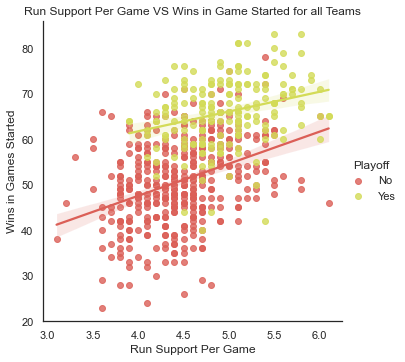

In [90]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set_theme(style="white", palette="hls")
sns.lmplot(data = starting_pitching, x = "RS/GS", y = "Wgs", hue="Playoff")
plt.xlabel("Run Support Per Game")
plt.ylabel("Wins in Games Started")
plt.title("Run Support Per Game VS Wins in Game Started for all Teams")

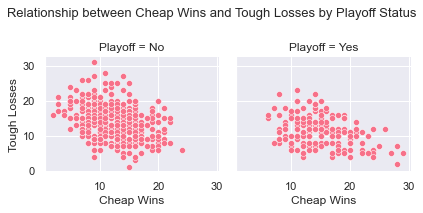

In [114]:
sns.set(rc={'figure.figsize':(14,12)})
sns.set_theme(palette="husl")
g = sns.FacetGrid(starting_pitching, col="Playoff")
g.map(sns.scatterplot, "Wchp", "Ltuf")
plt.subplots_adjust(top=0.75)
plt.suptitle('Relationship between Cheap Wins and Tough Losses by Playoff Status', fontsize = 13)
g.set_axis_labels("Cheap Wins", "Tough Losses")